# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [1]:
import numpy as np
import pandas as pd

#Cargamos los datos y mostramos su descripción
df1 = pd.read_csv('airbnb.csv')
df1.dropna(inplace=True)
df1.head()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0


In [2]:
df1.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,0.155954,0.777170,0.218562,0.004267,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,0.362824,0.416159,0.413285,0.065187,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,0.000000,1.000000,0.000000,0.000000,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,0.000000,1.000000,0.000000,0.000000,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,0.000000,1.000000,0.000000,0.000000,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,440.000000


El dataframe contiene información acerca de diferntes publicaciones de airbnb. Estudiemos el significado de sus variables:
- accommodates: Número de personas que puede albergar la estancia
- bathrooms: Numero de baños de la estancia
- bedrooms: Habitaciones de la estancia
- guests_included: Personas 
- host_listing_count: Numero de estancias que tiene en oferta el host
- latitude, longitude: Posición geográfica del lugar
- minimum_nights: estancia mínima
- number_of_reviews: Numero de valoraciones de esa estancia
- distance_center: Distancia al centro de la ciudad
- Habitaciones varias
- price: Precio

Podemos ver que la media de estancias están pensadas para 1 o 2 personas, con 2 o 3 habitaciones y 1 baño. Las estancia media es de 3 noches. Los valores host_listing_count y number_reviews tienen mucho error (std) debido a la grán dispersión de los datos. El precio también tiene una gran disparidad de valores. 

Podemos obtener también que hay al menos una estancia sin baño y pensada para una persona. El precio mínimo en la plataforma es de 19€. 

Los datos máximos también pueden ser consultados siguiendo el mismo método. 

Los cuartiles no resultan interesantes en esta descripción

<AxesSubplot:ylabel='Frequency'>

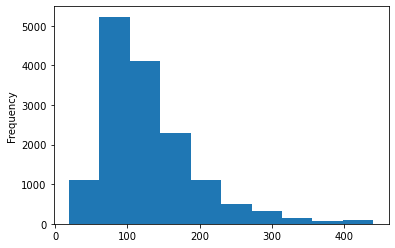

In [44]:
df1['price'].plot.hist()

Podemos ver que la mayoría de las estancias tienen precios entre 0€ y 100€. Veamos en detalle la distribución de precios en el rango [0,100]. Como curiosidad podemos ver como hay más pisos de 800€ que de 600 y 700.

<AxesSubplot:>

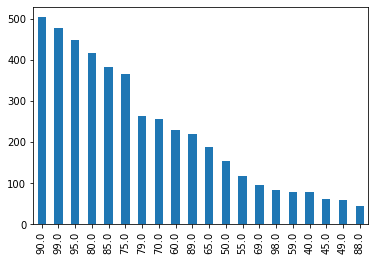

In [10]:
import matplotlib.pyplot as plt 

df2 = df1[df1['price'] < 100]
df2 = df2[df2['price'] > 1]
df2['price'].value_counts().head(20).plot.bar()

#Esto comprueba que los datos se han filtrado correctamente
#df2 = df2.sort_values(by='price')
#df2.tail()

El código anterior muestra en detalle la distribución de precios, concretamente los 20 precios más populares.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [38]:
correl = df1.corr(method='pearson')
correl['price']


accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
instant_bookable      -0.004410
entire_home            0.361313
private_room          -0.357184
shared_room           -0.042109
price                  1.000000
Name: price, dtype: float64

In [52]:
variables = correl[abs(correl['price']) >= 0.2] 
variables = variables.transpose()
del[variables['price']]

#Creamos la lista de headers
lt = list(variables)
df3 = df1[lt]
df3

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room
0,4,2.0,2.0,1,3.279483,1,0
1,4,1.0,2.0,2,5.951843,1,0
2,2,1.0,1.0,1,2.601055,1,0
3,2,1.0,1.0,1,1.095138,0,1
4,2,1.0,1.0,1,0.844491,1,0
...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0
14994,4,1.0,2.0,1,5.687407,1,0
14995,2,1.0,1.0,1,1.620395,1,0
14996,3,1.0,1.0,1,1.777881,1,0


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

Para trabajar con redes neuronales es mejor reescalar los datos para que así mejore el entrenamiento de la red neuronal.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Transformamos las variables de entrada
scaler.fit(df3)
dfScaled = scaler.transform(df3)

# Transformamos la variable de salida
price = df1['price'].to_numpy().reshape(-1, 1)
scaler.fit(price) # Como es una sola variable es necesario ponerlo en modo columna
priceScaled = scaler.transform(price)

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [43]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

RANDOM_STATE = 16

cv_scores_mean = []
cv_scores_std = []
regul_param_range = 10.0 ** - np.arange(1,7)    #[0.1, 0.01, ..., 0.0000001]

for regul_param in regul_param_range: #Buscamos convergencia
    mlp = MLPRegressor(hidden_layer_sizes = (200, ), activation = 'relu', solver = 'adam', alpha = regul_param, #cuidado con alpha
                       batch_size = 100, learning_rate = 'constant', learning_rate_init = 0.001, max_iter = 500, 
                       random_state = RANDOM_STATE)
    
    # neg_mean_squared_error es inverso, cuanto mayor mejor
    scores = cross_val_score(mlp, dfScaled, priceScaled.ravel(), cv = 5, scoring = 'neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.4481403724607434,
  -0.45318756177667596,
  -0.4610298543568464,
  -0.4590567171554829,
  -0.4637704765552586,
  -0.4584188081245963],
 [0.019211255813046217,
  0.023241029538788247,
  0.016622309761342265,
  0.017991023442248896,
  0.018964650477785658,
  0.018930536494140553])

In [ ]:
cv_scores_mean = []
cv_scores_std = []
regul_param_range = 10.0 ** - np.arange(1,7)    #[0.1, 0.01, ..., 0.0000001]

for regul_param in regul_param_range: #Buscamos convergencia
    mlp = MLPRegressor(hidden_layer_sizes = (100,2), activation = 'relu', solver = 'adam', alpha = regul_param, #cuidado con alpha
                       batch_size = 100, learning_rate = 'constant', learning_rate_init = 0.001, max_iter = 500, 
                       random_state = RANDOM_STATE)
    
    # neg_mean_squared_error es inverso, cuanto mayor mejor
    scores = cross_val_score(mlp, dfScaled, priceScaled.ravel(), cv = 5, scoring = 'neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?